Create an electronic report with a maximum of 2000 words (excluding citations) using Jupyter. The report should include the posed question, conducted analysis, and derived conclusion. Only one team member needs to submit this report. It is not required to include all tasks completed by each group member in their individual assignments. Make sure to reach a consensus among all team members on the final content of the report. If needed, consult your TA and Instructor for further guidance.

## Best Variables for Prediction for GitHub Stars

### Introduction

Start with relevant background information on the topic to prepare those unfamiliar for the rest of your proposal.

Formulate one or two questions for investigation and detail the dataset that will be utilized to address these questions.

Additionally, align your question/objectives with the existing literature. To contextualize your study, include a minimum of two scientific publications (these should be listed in the References section).

GitHub repositories are online platforms that are useful for coding projects and assignments. Repositories allow for collaboration with other GitHub users, as well as viewing opportunities for anyone interested in exploring topics of interest. Projects can vary based on content, coding language and size, just to name a few aspects. Furthermore, repository features allow for identifying popularity among repositories, something which will be of importance in our analysis. GitHub is a website that provides a graphical interface for version control using Git which allows developers to maintain their code and track the versions of their project as it progresses. Projects are hosted in repositories, which can be starred by GitHub users if they like them. Surveys confirm that stars are viewed by pratictioners as the most useful measure of a repository's popularity (Borges & Valente, 2018). As GitHub becomes more and more prevalent among developers for use in version control, it can be interesting to see what variables best predict popularity. Recent attempts have been made to solve this problem, such as Moid et. al. with a Random Forest regressor, but no research exists on using Ridge regression on this problem (2021). We will explore this below.

Our question will be the following:

**Which explanatory variables best predict stars on a GitHub repository?**

### Methods and Results

In this section, you will include:

a) “Exploratory Data Analysis (EDA)”

Demonstrate that the dataset can be read into R.
Clean and wrangle your data into a tidy format.
Plot the relevant raw data, tailoring your plot to address your question.
Make sure to explore the association of the explanatory variables with the response.
Any summary tables that are relevant to your analysis.
Be sure not to print output that takes up a lot of screen space.
Your EDA must be comprehensive with high quality plots.

Describe in written English the methods you used to perform your analysis from beginning to end, and narrate the code that does the analysis.
If included, describe the “Feature Selection” process and how and why you choose the covariates of your final model.
Make sure to interpret/explain the results you obtain. It’s not enough to just say, “I fitted a linear model with these covariates, and my R-square is 0.87”.
If inference is the aim of your project, a detailed interpretation of your fitted model is required, as well as a discussion of relevant quantities (e.g., are the coefficients significant? How does the model fit the data)?
A careful model assessment must be conducted.
If prediction is the project's aim, describe the test data used or how it was created.
Ensure your tables and/or figures are labelled with a figure/table number.

* Title: Most Popular GitHub Repositories (Projects)
* Number of Observations: 215029
* Number of Variables: 24

The dataset consists of public repository data from GitHub, collected using the GitHub API. The data includes a wide range of attributes related to the repositories, such as metadata about the repository, owner details and various statistical measures about contributions and activity. Each repository corresponds to a project created by each respective user.

Here's a detailed summary of the variables in the dataset:

* `Name` - chr, name of the repository.
* `URL` - chr, URL or web address that links to the GitHub repository.
* `Created_At` - dttm, date and time when the repository was initially created on GitHub.
* `Updated_At` - dttm, date and time of the most recent update/modification to the repository.
* `Homepage` - chr, URL to the homepage or landing page associated with the repository.
* `Size` - dbl, size of the repository in bytes.
* `Stars` - dbl, number of stars or likes that the repository has received from other users.
* `Forks` - dbl, number of times the repository has been forked by other users.
* `Issues` - dbl, number of total issues.
* `Watchers` - dbl, number of GitHub users who are "watching" or monitoring the repository.
* `Language` - chr, primary coding language.
* `License` - chr, Information about the software license using a license identifier.
* `Topics` - list, a list of topics or tags associated with the repository.
* `Has_Issues` - lgl, indicates whether the repository has an issue tracker enabled.
* `Has_Projects` - lgl, indicates whether the repository uses GitHub Projects.
* `Has_Downloads` - lgl, indicates whether the repository offers downloadable files or assets.
* `Has_Wiki` - lgl, indicates whether the repository has an associated wiki.
* `Has_Pages` - lgl, indicates whether the repository has GitHub Pages enabled for a website.
* `Has_Discussions` - lgl, indicates whether the repository has GitHub Discussions enabled.
* `Is_Fork`- lgl, indicates whether the repository is a fork of another repository.
* `Is_Archived` - lgl, indicates whether the repository is archived.
* `Is_Template` - lgl, indicates whether the repository is set up as a template.
* `Default_Branch` - chr, name of the default branch.

The dataset will provide valuable insights into the associations between the outlined explanatory variables and the star count of GitHub repositories. By analyzing this data, we aim to develop models that effectively highlight which variables are most strongly associated with repository popularity. While we will not assume causality, our goal is to assess the relative importance of these explanatory variables and infer which ones demonstrate the strongest relationships with the response variable.

Our inquiry primarily focuses on inference, as we seek to draw conclusions about the broader population of GitHub repositories. Specifically, we want to determine whether our model can accurately forecast the number of stars a repository might receive based on its characteristics, even for observations outside of the dataset. The accuracy of our predictions will be crucial in evaluating the effectiveness of our analysis and confirming whether we have successfully identified the variables with the highest explanatory power. 

Loading in our Libraries:

In [1]:
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(AER)
library(janitor)
library(scales)
library(latex2exp)
library(tidymodels)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)
library(cowplot)
library(tibble)
library(readr)
library(dplyr)
library(tidyverse)
library(ggplot2)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: lmtest

Loading required package: zoo


A

Uploading our dataset:

In [2]:
github_data <- read_csv("repositories.csv")
head(github_data)

Rows: 215029 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): Name, Description, URL, Homepage, Language, License, Topics, Defau...
dbl  (5): Size, Stars, Forks, Issues, Watchers
lgl  (9): Has Issues, Has Projects, Has Downloads, Has Wiki, Has Pages, Has ...
dttm (2): Created At, Updated At

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,⋯,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template,Default Branch
<chr>,<chr>,<chr>,<dttm>,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
freeCodeCamp,freeCodeCamp.org's open-source codebase and curriculum. Learn to code for free.,https://github.com/freeCodeCamp/freeCodeCamp,2014-12-24 17:49:19,2023-09-21 11:32:33,http://contribute.freecodecamp.org/,387451,374074,33599,248,⋯,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,main
free-programming-books,:books: Freely available programming books,https://github.com/EbookFoundation/free-programming-books,2013-10-11 06:50:37,2023-09-21 11:09:25,https://ebookfoundation.github.io/free-programming-books/,17087,298393,57194,46,⋯,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,main
awesome,😎 Awesome lists about all kinds of interesting topics,https://github.com/sindresorhus/awesome,2014-07-11 13:42:37,2023-09-21 11:18:22,NA,1441,269997,26485,61,⋯,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,main
996.ICU,Repo for counting stars and contributing. Press F to pay respect to glorious developers.,https://github.com/996icu/996.ICU,2019-03-26 07:31:14,2023-09-21 08:09:01,https://996.icu,187799,267901,21497,16712,⋯,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,master
coding-interview-university,A complete computer science study plan to become a software engineer.,https://github.com/jwasham/coding-interview-university,2016-06-06 02:34:12,2023-09-21 10:54:48,NA,20998,265161,69434,56,⋯,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,main
public-apis,A collective list of free APIs,https://github.com/public-apis/public-apis,2016-03-20 23:49:42,2023-09-21 11:22:06,http://public-apis.org,5088,256615,29254,191,⋯,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,master


Cleaning irrelevant variables:

In [3]:
github_data_clean <- clean_names(github_data) |>
                select(-name, -description, -url, -created_at, -updated_at, -homepage, -language, -license, -topics, -default_branch)

colnames(github_data_clean)

[1] "size"            "stars"           "forks"           "issues"         
 [5] "watchers"        "has_issues"      "has_projects"    "has_downloads"  
 [9] "has_wiki"        "has_pages"       "has_discussions" "is_fork"        
[13] "is_archived"     "is_template"

Ensuring there are no `NA` values:

In [4]:
na_counts <- github_data_clean %>%
  summarise(across(everything(), ~ sum(is.na(.)))) %>%
  pivot_longer(everything(), names_to = "column", values_to = "na_count")

na_counts

column,na_count
<chr>,<int>
size,0
stars,0
forks,0
issues,0
watchers,0
has_issues,0
has_projects,0
has_downloads,0
has_wiki,0


To begin with visualizations, we want to first analyze the `Stars` variable's possible relation to other continuous variables. We will create multiple scatterplots for comparison using a random sample from the github dataset.

In [5]:
github_sample <- rep_sample_n(github_data_clean,size = 100, reps = 1, replace = FALSE)

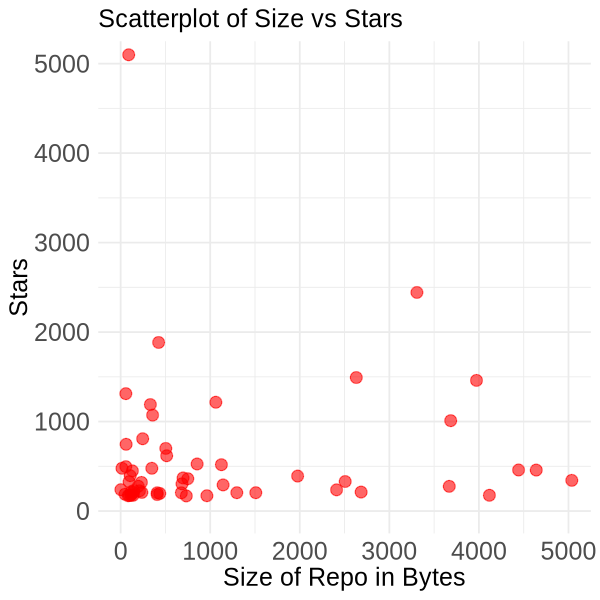

In [6]:
options(repr.plot.width = 5, repr.plot.height = 5) 
size_plot <- ggplot(github_sample, aes(x = size, y = stars)) +
  geom_point(color = "red", alpha = 0.6, size = 3) +  
  labs(title = "Scatterplot of Size vs Stars",  
       x = "Size of Repo in Bytes",  
       y = "Stars") +  
    coord_cartesian(xlim = c(0, 5000), ylim = c(0, 5000)) +
  theme_minimal() +  
  theme(
    plot.title = element_text(size = 15),  
    axis.title = element_text(size = 15),    
    axis.text = element_text(size = 15)      
  )

size_plot

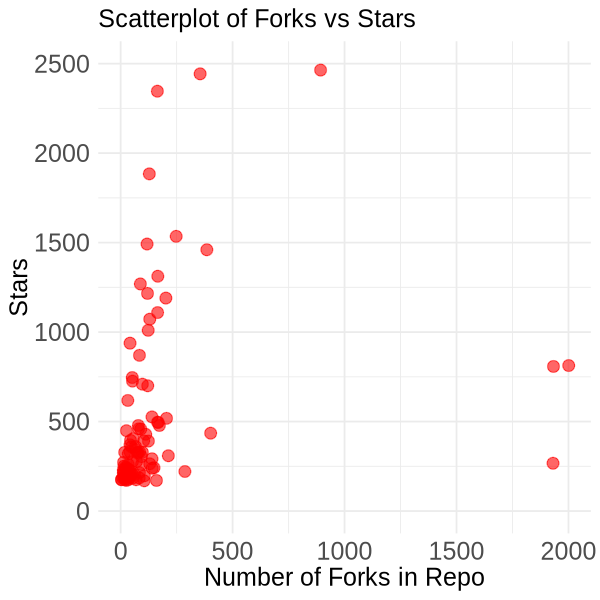

In [7]:
options(repr.plot.width = 5, repr.plot.height = 5) 
Forks_plot <- ggplot(github_sample, aes(x = forks, y = stars)) +
  geom_point(color = "red", alpha = 0.6, size = 3) +  
  labs(title = "Scatterplot of Forks vs Stars",  
       x = "Number of Forks in Repo",  
       y = "Stars") +  
    coord_cartesian(xlim = c(0, 2000), ylim = c(0, 2500)) +
  theme_minimal() +  
  theme(
    plot.title = element_text(size = 15),  
    axis.title = element_text(size = 15),    
    axis.text = element_text(size = 15)      
  )

Forks_plot

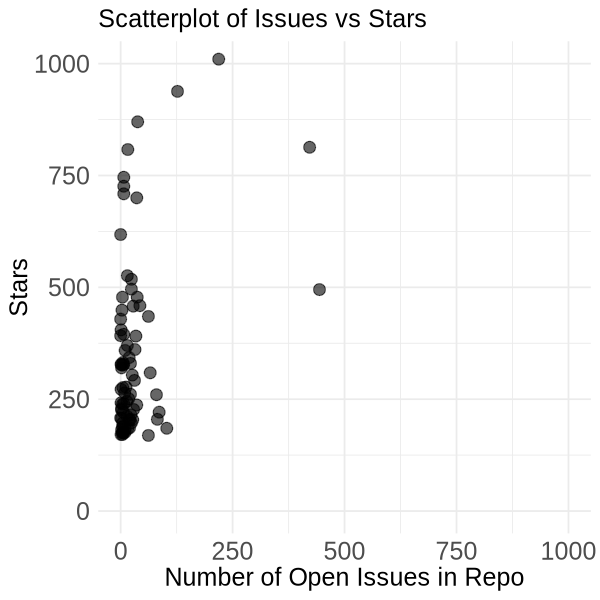

In [8]:
options(repr.plot.width = 5, repr.plot.height = 5) 
Issues_plot <- ggplot(github_sample, aes(x = issues, y = stars)) +
  geom_point(color = "black", alpha = 0.6, size = 3) +  
  labs(title = "Scatterplot of Issues vs Stars",  
       x = "Number of Open Issues in Repo",  
       y = "Stars") +  
  theme_minimal() +  
    coord_cartesian(xlim = c(0, 1000), ylim = c(0, 1000)) +
  theme(
    plot.title = element_text(size = 15),  
    axis.title = element_text(size = 15),    
    axis.text = element_text(size = 15)      
  )

Issues_plot

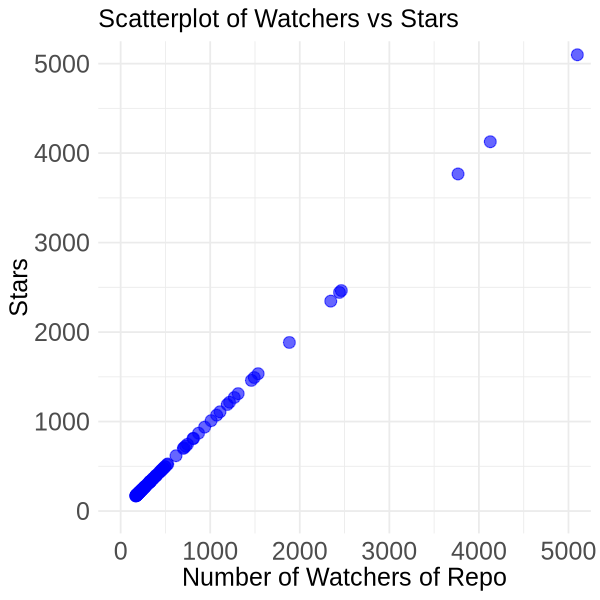

In [9]:
options(repr.plot.width = 5, repr.plot.height = 5) 
Watchers_plot <- ggplot(github_sample, aes(x = watchers, y = stars)) +
  geom_point(color = "blue", alpha = 0.6, size = 3) +  
  labs(title = "Scatterplot of Watchers vs Stars",  
       x = "Number of Watchers of Repo",  
       y = "Stars") +  
  theme_minimal() +  
    coord_cartesian(xlim = c(0, 5000), ylim = c(0, 5000)) +
  theme(
    plot.title = element_text(size = 15),  
    axis.title = element_text(size = 15),    
    axis.text = element_text(size = 15)      
  )

Watchers_plot

The main purpose of the scatterplots is to identify possible relationships between the Stars variable and other continuous variables. We can see a strong positive relationship between Watchers and Stars, along with a weaker, but positive relationship between Forks and Stars. These both are what we expect, as more watchers and more forks can increase exposure to a repository, increasing the possibility of recieving stars. Furthermore, we can see a weak and negative relationship between Issues and Stars. This is also to be expected, as users may be less likely to interact with a repository if the number of issues hinders the use of the repository. Lastly, we see minimal correlation between Size and Stars, perhaps predicting the possible omission of Size from future created models. These scatterplots serve as an indication of possible variables that will either be included or excluded in further inference and prediction methods.

For the Forks and Stars plot, we can see a large concentration of observations closer to the origin, possibly indicating a larger subset of repositories have a small amount of stars and small amount of forks. Furthermore, the Issues and Stars plot demonstrates a similar concentration of observations closer to the origin. The majority of repositories seem to have a small number of issues, which seems to translate to a higher amount of stars.

#### Correlation Heatmap

To explore the problem of multicollinearity, we will focus on the numerical variables in the dataset. We will use a correlation matrix heatmap to assess if multicolinearity exists.

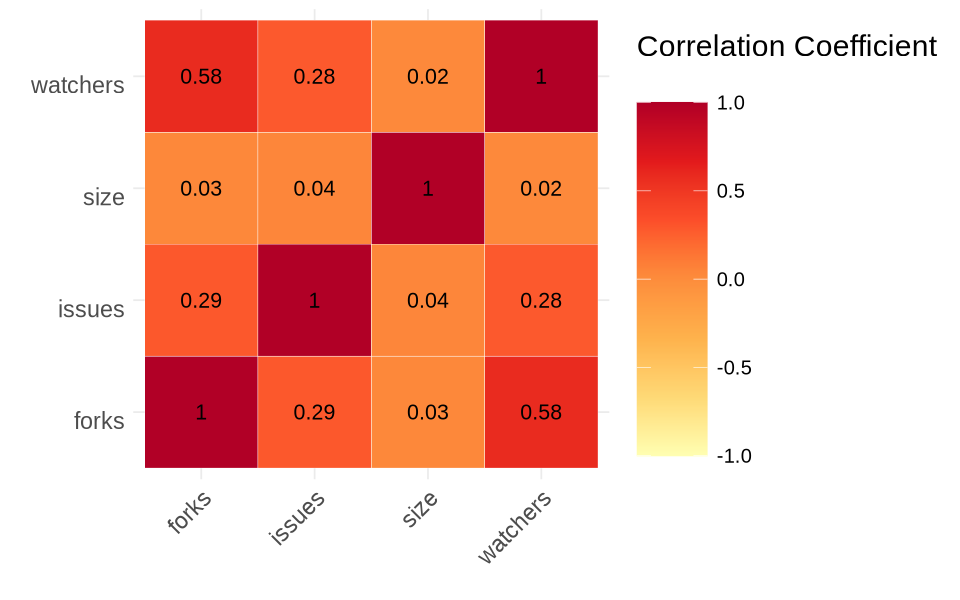

In [17]:
options(repr.plot.width = 8, repr.plot.height = 5) 

github_numerical_df <- github_data_clean %>%
  select(size, watchers, forks, issues)

corr_matrix <- 
    github_numerical_df %>%  
    cor() %>%
    as_tibble(rownames = 'var1') %>%
    pivot_longer(-var1, names_to = "var2", values_to = "corr")

plot_corr_matrix <- 
    corr_matrix %>%
    ggplot(aes(var1, var2)) +
    geom_tile(aes(fill = corr), color = "white") +
    scale_fill_distiller("Correlation Coefficient \n",
                         palette = "YlOrRd",
                         direction = 1, 
                         limits = c(-1, 1)
    ) +
    labs(x = "", y = "") +
    theme_minimal() +
    theme(
        axis.text.x = element_text(angle = 45, vjust = 1, size = 14, hjust = 1),
        axis.text.y = element_text(vjust = 1, size = 14, hjust = 1),
        legend.title = element_text(size = 18),
        legend.text = element_text(size = 12),
        legend.key.size = unit(1.5, "cm")
    ) +
    geom_text(aes(var2, var1, label = round(corr, 2)), color = "black", size = 4.5)

plot_corr_matrix

The correlation matrix heatmap signifies a potentially concering correlation between watchers and forks.

Adding missing grouping variables: `replicate`
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”


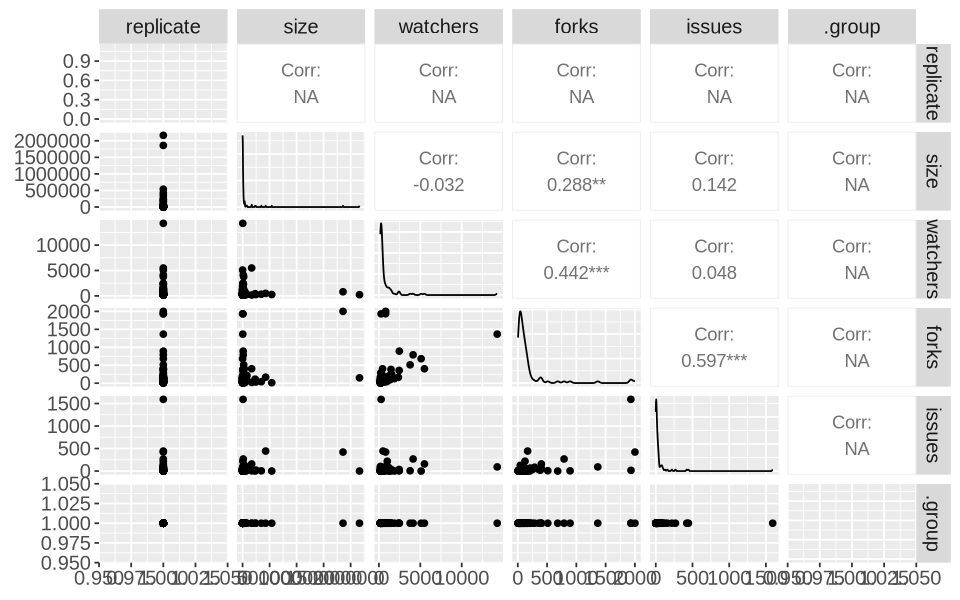

In [16]:
github_numerical_sample_df <- github_sample %>%
  select(size, watchers, forks, issues)

github_pair_plots <- 
    github_numerical_sample_df %>% 
    ggpairs(progress = FALSE) +
    theme(text = element_text(size = 15))

github_pair_plots

### Implementation of methods

A reminder of our proposed question: **Which explanatory variables best predict stars on a GitHub repository?** 

To answer this question, we will use LASSO regression, which naturally performs feature selection. We will then train a multiple linear regessor with the top 3-5 predictors depending on testing RMSE.

To conduct this analysis, we will use 10-fold cross validation to tune the best value of $\lambda$, a hyperparameter of LASSO for regularization and a training-testing split to ensure our model doesn't suffer from post-inference problems such as inflated Type I error. 

Because LASSO regression is biased estimator, it is known that the coefficients in regression produced by LASSO do not lay at the center of the true sampling distribution of the explanatory variable's coefficients. Effectively, LASSO can only be used as a variable selection method and not for inference. This is a weakness of our method called post-LASSO error. To correct this error, we will use LASSO for variable selection and then multiple linear regression following the variable selection process.

In order to use this method, we need to scale all numeric variables in our data set, as the coefficients associated with each variable in the context of LASSO regression is dependent upon their scale: a variable on a much larger scale than others will have a diminished coefficient not representative of its relative importance for prediction. 

The assumptions necessary for using these methods are:
- Each explanatory variable affects the response variable independently from the others, i.e. no multicollinearity
- Each explanantory variable is linearly related to the response variable
- Each measurement from each explanatory variable is independent from the others (satisfied in this case, as each observation pertains to a different GitHub repo)
- Our sample size, $n$, is large enough so that the error terms of the explanatory variables are normally-distributed
- The variance of error of each explanatory variable is equal among observations, i.e. no heteroscedasticity
- The numeric variables in the data set are scaled

In [12]:
# scaling numeric features

numeric_cols <- sapply(github_data_clean, is.numeric)

github_data_clean[numeric_cols] <- scale(github_data_clean[numeric_cols])

head(github_data_clean)

size,stars,forks,issues,watchers,has_issues,has_projects,has_downloads,has_wiki,has_pages,has_discussions,is_fork,is_archived,is_template
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
0.47432990,93.41788,26.84285,1.06903622,93.41788,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
-0.05295532,74.46148,45.82565,0.04109144,74.46148,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
-0.07523044,67.34891,21.11945,0.11742398,67.34891,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
0.19008643,66.82391,17.10648,84.85162450,66.82391,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
-0.04738725,66.13760,55.67305,0.09197980,66.13760,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
-0.07003823,63.99702,23.34719,0.77897260,63.99702,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


### Training/testing split

Below, we split the data twice. Once, a 70-30 split into training and testing data. Then, we take the training data and split it into training and validation. We will use the validation set for the 10-fold cross-validation we perform tuning $\lambda$, a hyper-parameter of LASSO regression.

In [13]:
set.seed(1234)

repo_split <- initial_split(github_data_clean, prop = 0.7, strata = stars)
training_repos <- training(repo_split)
testing_repos <- testing(repo_split)

In [14]:
set.seed(1234)

repo_split <- initial_split(github_data_clean, prop = 0.7, strata = stars)
training_repos <- training(repo_split)
testing_repos <- testing(repo_split)

In [15]:
# splitting the data into explanatory variables, X, and response, Y, to tune lambda

training_Y <- training_repos |>
            select(stars) |>
            as.matrix()

training_X <- training_repos |>
        select(-stars) |>
            as.matrix()

testing_Y <- testing_repos |>
            select(stars) |>
            as.matrix()

testing_X <- testing_repos |>
        select(-stars) |>
            as.matrix()

### Discussion

In this section, you’ll interpret the results you obtained in the previous section with respect to the main question/goal of your project.

Summarize what you found and the implications/impact of your findings.
If relevant, discuss whether your results were what you expected to find.
Discuss how your model could be improved;
Discuss future questions/research this study could lead to.

### References

Borges, Hudson, and Marco Tulio Valente. “What’s in a GitHub Star? Understanding Repository Starring Practices in a Social Coding Platform.” Journal of Systems and Software, vol. 146, Dec. 2018, pp. 112–129, www.sciencedirect.com/science/article/pii/S0164121218301961, https://doi.org/10.1016/j.jss.2018.09.016. Accessed 4 Nov. 2019.

Moid, Mohammed Abdul, et al. “Predicting Stars on Open-Source GitHub Projects.” 2022 Smart Technologies, Communication and Robotics (STCR), 9 Oct. 2021, ieeexplore.ieee.org/document/9588891, https://doi.org/10.1109/stcr51658.2021.9588891. Accessed 5 Dec. 2024.